Red: 205.95602612156574
Green: 176.29672707600758
Blue: 155.0887978669964


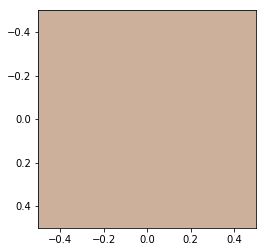

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
# ---- START FUNCTIONS ----#

# display an image plus label and wait for key press to continue
def display_image(image, name):
    window_name = name
    cv2.namedWindow(window_name)
    cv2.imshow(window_name, image)
    cv2.waitKey()
    cv2.destroyAllWindows()


# segment using otsu binarization and thresholding
def segment_otsu(image_grayscale, img_BGR):
    threshold_value, threshold_image = cv2.threshold(image_grayscale, 0, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    display_image(threshold_image, "otsu") 
    threshold_image_binary = 1- threshold_image/255
    threshold_image_binary = np.repeat(threshold_image_binary[:, :, np.newaxis], 3, axis=2)
    img_face_only = np.multiply(threshold_image_binary, img_BGR)
    img_face_only = np.array(img_face_only, dtype=np.uint8)
    return img_face_only

# ---- MAIN ----#

# read in image into openCV BGR and grayscale
image_path = './images/image.jpg'
width_opt = 700 # NONE = image wont be resized 


img = cv2.imread(image_path, 3)
if width_opt:
    img = imutils.resize(img, width=width_opt)
img.shape
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
img_BGR = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
img_BGR.shape
display_image(img_BGR, "BGR")

img_grayscale = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)
display_image(img_grayscale, "grayscale")

# foreground and background segmentation (otsu)
img_face_only = segment_otsu(img_grayscale, img_BGR)
display_image(img_face_only, "segmented BGR")

# convert to HSV and YCrCb color spaces and detect potential pixels
img_HSV = cv2.cvtColor(img_face_only, cv2.COLOR_BGR2HSV)
img_YCrCb = cv2.cvtColor(img_face_only, cv2.COLOR_BGR2YCrCb)
display_image(img_HSV, "HSV")
display_image(img_YCrCb, "YCrCb")

# aggregate skin pixels
blue = []
green = []
red = []

height, width, channels = img_face_only.shape

for i in range (height):
    for j in range (width):
        if((img_HSV.item(i, j, 0) <= 170) and (140 <= img_YCrCb.item(i, j, 1) <= 170) and (90 <= img_YCrCb.item(i, j, 2) <= 120)):
            blue.append(img_face_only[i, j].item(0))
            green.append(img_face_only[i, j].item(1))
            red.append(img_face_only[i, j].item(2))
        else:
            img_face_only[i, j] = [0, 0, 0]
skin_tone_estimate_BGR = [np.mean(blue), np.mean(green), np.mean(red)]
print ("Red:",skin_tone_estimate_BGR[2]) 
print ("Green:",skin_tone_estimate_BGR[1])
print ("Blue:",skin_tone_estimate_BGR[0])
plt.imshow([[(skin_tone_estimate_BGR[2]/255, skin_tone_estimate_BGR[1]/255, skin_tone_estimate_BGR[0]/255)]])
plt.show()

display_image(img_face_only, "final segmentation")

# determine mean skin tone estimate
